<a href="https://colab.research.google.com/github/jackarl/programacion_analitica/blob/main/TextClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSTRUCCIONES

•	Utilizar el dataset IMDB Reviews.csv, el cual contiene dos clases en la columna ‘Sentimiento’: 1 indica un sentimiento positivo y 0 uno negativo.     
NOTA: Los comentarios están en inglés.

•	Realizar el preprocesamiento adecuado.

•	Realizar un análisis exploratorio de datos.

•	Utilizar Bag of Words y TF-IDF para transformar los comentarios que están en la columna ‘Review’ a vectores.

•	Utiliza una partición (train_test_split) 80-20 para los conjuntos train y test.

•	Entrenar los modelos Multinomial Naive Bayes, SVM, Random Forest, kNN y Logistic Regression

•	Mostrar la matriz de confusión.

•	Aplicar las métricas Precision, Recall, F1-Score (por cada una de las clases), Accuracy y AUC-ROC.


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
#[expression for V in iter if condition]
data = [i.strip() for i in open('/content/drive/MyDrive/MIAAD/2do semestre/NLP/Clasificacion de texto/IMDB Reviews.csv', 'r').readlines()]

In [4]:
data[1]

'"One of the other reviewers has mentioned that after watching just 1 Oz episode you\'ll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the 

In [ ]:
#nltk.download_shell()

In [5]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [6]:
for mess_no, message in enumerate(data[:10]):
    print(mess_no, message)
    print('\n')

0 review,sentimento


1 "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of t

In [7]:
data[1]

'"One of the other reviewers has mentioned that after watching just 1 Oz episode you\'ll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the 

In [8]:
data = pd.read_csv("/content/drive/MyDrive/MIAAD/2do semestre/NLP/Clasificacion de texto/IMDB Reviews.csv", sep = ',', encoding='latin-1')
data.head()

,review,sentimento
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Exploratory Data Analysis (EDA)

In [36]:
data.shape

(50000, 2)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

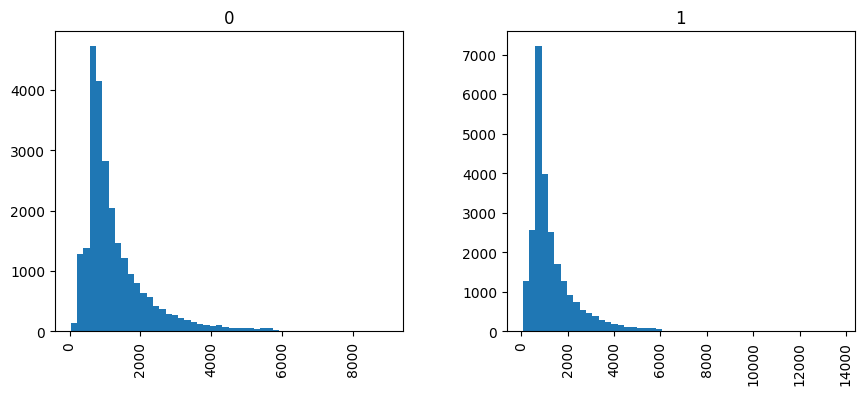

In [39]:
data['length'] = data['review'].apply(len)
data.hist(column='length', by='sentimento', bins=50,figsize=(10,4))

<Axes: xlabel='sentimento'>

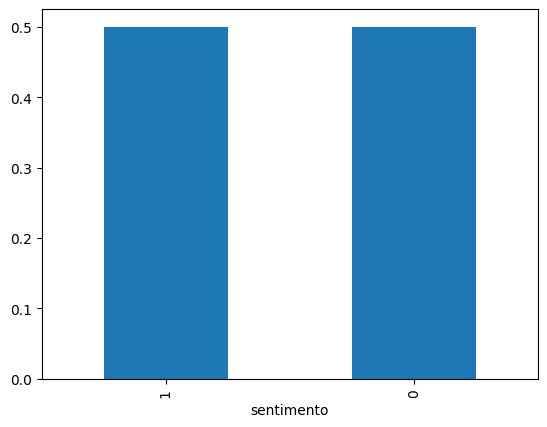

In [40]:
data['sentimento'].value_counts(normalize = True).plot.bar()

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
# download nltk
import nltk
nltk.download('all')

# create a list text
sentimento = list(data['review'])

# preprocessing loop

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

In [11]:
stopwords.words('english')  # all english stopwords, if you want from spanish: stopwords.words('spanish')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [12]:
def process_text(clean_mess):
    nopunc = [char for char in clean_mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [13]:
data.head()

,review,sentimento
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [14]:
data['review'].apply(process_text)

,review
0,"[One, reviewers, mentioned, watching, 1, Oz, e..."
1,"[wonderful, little, production, br, br, filmin..."
2,"[thought, wonderful, way, spend, time, hot, su..."
3,"[Basically, theres, family, little, boy, Jake,..."
4,"[Petter, Matteis, Love, Time, Money, visually,..."
...,...
49995,"[thought, movie, right, good, job, wasnt, crea..."
49996,"[Bad, plot, bad, dialogue, bad, acting, idioti..."
49997,"[Catholic, taught, parochial, elementary, scho..."
49998,"[Im, going, disagree, previous, comment, side,..."


In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

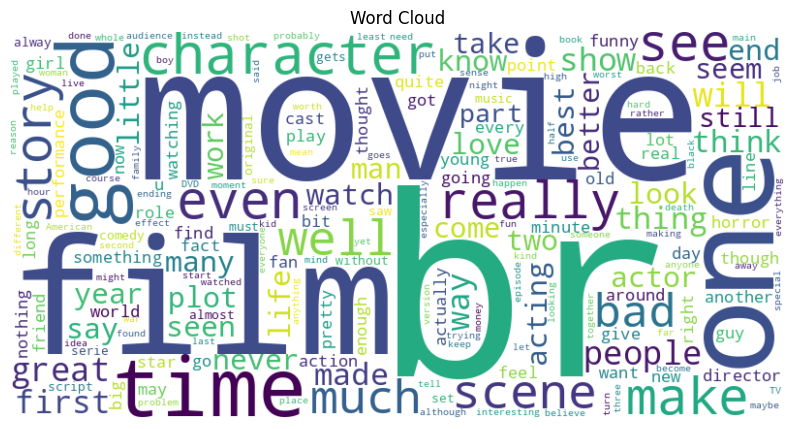

In [16]:
plt.figure(figsize=(10, 6))
wordcloud_clean = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(data['review'].str.cat(sep=' '))
plt.imshow(wordcloud_clean, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

BoW

In [56]:
BoW_trans = CountVectorizer(analyzer=process_text).fit(data['review'])

In [19]:
print(len(BoW_trans.vocabulary_))

214867


In [20]:
dt = data['review'][3]

In [21]:
dt

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [62]:
bw = BoW_trans.transform([dt])

In [64]:
print(bw)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 58 stored elements and shape (1, 214867)>
  Coords	Values
  (0, 92)	1
  (0, 2346)	1
  (0, 9852)	1
  (0, 11091)	1
  (0, 24683)	1
  (0, 44394)	4
  (0, 61820)	1
  (0, 64660)	1
  (0, 69628)	1
  (0, 99040)	1
  (0, 102400)	1
  (0, 105647)	1
  (0, 105762)	3
  (0, 111959)	2
  (0, 118772)	1
  (0, 119866)	1
  (0, 120500)	1
  (0, 122399)	1
  (0, 123511)	3
  (0, 128803)	1
  (0, 130061)	1
  (0, 131544)	1
  (0, 131645)	2
  (0, 132459)	1
  (0, 137326)	1
  :	:
  (0, 160410)	3
  (0, 161642)	1
  (0, 166846)	1
  (0, 169329)	2
  (0, 172301)	1
  (0, 178492)	1
  (0, 183016)	1
  (0, 185680)	1
  (0, 188303)	1
  (0, 189025)	1
  (0, 190298)	1
  (0, 190990)	1
  (0, 192999)	1
  (0, 196074)	1
  (0, 199932)	2
  (0, 200220)	1
  (0, 200701)	2
  (0, 201173)	1
  (0, 202266)	1
  (0, 209764)	1
  (0, 209779)	1
  (0, 210417)	1
  (0, 214031)	1
  (0, 214304)	1
  (0, 214310)	1


In [67]:
BoW_trans.get_feature_names_out()[105762]

'br'

In [68]:
data_bow = BoW_trans.transform(data['review'])

TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

In [105]:
Transformer = TfidfTransformer.fit(data_bow)

In [106]:
Transformer_bow = Tfidf_trans.transform(data_bow)

In [107]:
print(Transformer_bow)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5102642 stored elements and shape (50000, 214867)>
  Coords	Values
  (0, 91)	0.04636454185075692
  (0, 19525)	0.08033211242379566
  (0, 19870)	0.11899372140631528
  (0, 29078)	0.09863431637791872
  (0, 29113)	0.10815796517138916
  (0, 32908)	0.07442358896078392
  (0, 34138)	0.08478499109063153
  (0, 43544)	0.07009618761089091
  (0, 43778)	0.08559397499689689
  (0, 49902)	0.09667458001748458
  (0, 55448)	0.10319175416710896
  (0, 59197)	0.08934242887982177
  (0, 62078)	0.09321844442848749
  (0, 62658)	0.03961265408532504
  (0, 63137)	0.09667458001748458
  (0, 63397)	0.3102164673485357
  (0, 65365)	0.12050639432083197
  (0, 76003)	0.09196826555380416
  (0, 80144)	0.07683896245030898
  (0, 86143)	0.07805748563229495
  (0, 90214)	0.06418673035834643
  (0, 94329)	0.08760977144660387
  (0, 95820)	0.07780298363664435
  (0, 95975)	0.10948184938951712
  (0, 98603)	0.058460034480882404
  :	:
  (49999, 145931)	0.10557979538566323
  (49

Train- Text

In [41]:
# Create Feature and Label sets

X = data['review']
y = data['sentimento']

# train test split (66% train - 33% test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)


print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (33500,)
Testing Data :  (16500,)


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(33500, 87531)

In [46]:
# Training Logistic Regression model

from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
lr.fit(X_train_cv, y_train)
# transform X_test using CV
X_test_cv = cv.transform(X_test)
# generate predictions
predictions = lr.predict(X_test_cv)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
print(predictions)

[0 1 1 ... 0 1 0]


In [47]:
# confusion matrix
from sklearn import metrics
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['+','-'], columns=['Positive','Negative'])

df

,Positive,Negative
+,7241,985
-,873,7401


In [48]:
from sklearn.naive_bayes import MultinomialNB

In [108]:
spam_detect_model = MultinomialNB().fit(Transformer_bow, data['sentimento'])

In [109]:
detect = spam_detect_model.predict(Transformer_bow)

In [110]:
print(detect)

[1 1 1 ... 0 0 0]


In [111]:
# Create a pipeline
from sklearn.pipeline import Pipeline

In [116]:
pipeline = Pipeline([
    ('BagOfWords', CountVectorizer(analyzer = process_text)),  # strings to token integer counts
    #('Score', TfidfTransformer()),  # Is is given me an error I dont know why
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [117]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('BagOfWords',
                 CountVectorizer(analyzer=<function process_text at 0x7a372ce3fc40>)),
                ('classifier', MultinomialNB())])

In [119]:
predictions = pipeline.predict(X_test)

In [118]:
from sklearn.metrics import confusion_matrix, classification_report

In [122]:
print(confusion_matrix(y_test, predictions))

[[7213 1013]
 [1327 6947]]


In [123]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      8226
           1       0.87      0.84      0.86      8274

    accuracy                           0.86     16500
   macro avg       0.86      0.86      0.86     16500
weighted avg       0.86      0.86      0.86     16500

